# NF-ToN-IoT

### NetFlow Version 1 of the datasets is made up of 8 basic NetFlow features. The details of the datasets are published in; Sarhan M., Layeghy S., Moustafa N., Portmann M. (2021) NetFlow Datasets for Machine Learning-Based Network Intrusion Detection Systems. In: Big Data Technologies and Applications. BDTA 2020, WiCON 2020. Springer, Cham. The use of the datasets for academic research purposes is granted in perpetuity after citing the above papers. For commercial purposes, it should be agreed upon by the authors. Please get in touch with the author Mohanad Sarhan for more details.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('NF-ToN-IoT.csv')
df.head(1)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.1.195,63318,52.139.250.253,443,6,91.0,181,165,2,1,24,327,0,Benign


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379274 entries, 0 to 1379273
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   IPV4_SRC_ADDR               1379274 non-null  object 
 1   L4_SRC_PORT                 1379274 non-null  int64  
 2   IPV4_DST_ADDR               1379274 non-null  object 
 3   L4_DST_PORT                 1379274 non-null  int64  
 4   PROTOCOL                    1379274 non-null  int64  
 5   L7_PROTO                    1379274 non-null  float64
 6   IN_BYTES                    1379274 non-null  int64  
 7   OUT_BYTES                   1379274 non-null  int64  
 8   IN_PKTS                     1379274 non-null  int64  
 9   OUT_PKTS                    1379274 non-null  int64  
 10  TCP_FLAGS                   1379274 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  1379274 non-null  int64  
 12  Label                       1379274 non-null  int64  
 1

In [20]:
df.duplicated().sum()

168345

1- We need to handel duplicates

In [21]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
L4_SRC_PORT,1379274.000000,41290.725338,17678.855330,0.000000,36620.000000,45524.000000,53810.000000,65535.000000
L4_DST_PORT,1379274.000000,7091.114285,16736.675853,0.000000,80.000000,80.000000,443.000000,65534.000000
PROTOCOL,1379274.000000,6.955538,3.174542,1.000000,6.000000,6.000000,6.000000,58.000000
L7_PROTO,1379274.000000,32.086140,40.882531,0.000000,7.000000,7.000000,91.000000,251.000000
IN_BYTES,1379274.000000,1466.229136,177963.170841,28.000000,112.000000,458.000000,554.000000,79415904.000000
OUT_BYTES,1379274.000000,2745.434165,110558.948502,0.000000,60.000000,696.000000,2239.000000,70165175.000000
IN_PKTS,1379274.000000,18.008291,2885.740826,1.000000,2.000000,4.000000,5.000000,1221043.000000
OUT_PKTS,1379274.000000,10.711574,1454.466233,0.000000,1.000000,4.000000,6.000000,1349068.000000
TCP_FLAGS,1379274.000000,21.215929,8.196017,0.000000,18.000000,26.000000,27.000000,219.000000
FLOW_DURATION_MILLISECONDS,1379274.000000,6633.697090,119731.985638,0.000000,0.000000,94.000000,382.000000,4294849.000000


In [12]:
data_details = {'unique':df.nunique(),
              'dtype':df.dtypes,
             'null':df.isna().sum(),
             }
data_details = pd.DataFrame(data_details)
data_details

,unique,dtype,null
IPV4_SRC_ADDR,174,object,0
L4_SRC_PORT,38857,int64,0
IPV4_DST_ADDR,1478,object,0
L4_DST_PORT,16071,int64,0
PROTOCOL,5,int64,0
L7_PROTO,97,float64,0
IN_BYTES,5049,int64,0
OUT_BYTES,5140,int64,0
IN_PKTS,921,int64,0
OUT_PKTS,812,int64,0


In [13]:
categorical_col = df.select_dtypes('object')

for i in categorical_col:
    print(f'value counts of {i} column')
    print(df[i].value_counts(), end="\n\n")

value counts of IPV4_SRC_ADDR column
192.168.1.31      269925
192.168.1.30      268910
192.168.1.36      244364
192.168.1.33      195761
192.168.1.184     112992
                   ...  
69.28.144.125          1
108.170.247.33         1
157.240.8.18           1
91.189.95.3            1
34.210.105.103         1
Name: IPV4_SRC_ADDR, Length: 174, dtype: int64

value counts of IPV4_DST_ADDR column
192.168.1.190      287600
192.168.1.184      240988
192.168.1.195      191669
192.168.1.152      190226
192.168.1.31        73608
                    ...  
193.108.91.37           1
194.146.106.22          1
52.26.202.10            1
188.166.127.243         1
34.208.191.228          1
Name: IPV4_DST_ADDR, Length: 1478, dtype: int64

value counts of Attack column
injection     468539
ddos          326345
Benign        270279
password      156299
xss            99944
scanning       21467
dos            17717
backdoor       17247
mitm            1295
ransomware       142
Name: Attack, dtype: int64



In [15]:
categorical_col = pd.DataFrame(categorical_col)
categorical_col.head()

,IPV4_SRC_ADDR,IPV4_DST_ADDR,Attack
0,192.168.1.195,52.139.250.253,Benign
1,192.168.1.79,192.168.1.255,Benign
2,192.168.1.79,239.255.255.250,Benign
3,192.168.1.193,192.168.1.255,Benign
4,192.168.1.79,192.168.1.255,Benign


<Axes: >

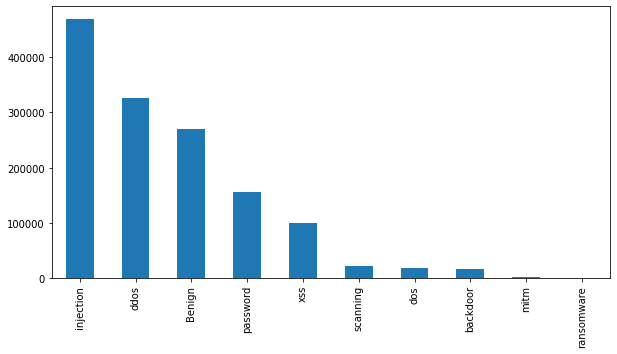

In [16]:
categorical_col['Attack'].value_counts().plot(kind='bar', figsize=(10,5))

2- We need to uniform the scale 

3- attack or label????

In [22]:
df.shape

(1379274, 14)

In [28]:
df.head(1)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.1.195,63318,52.139.250.253,443,6,91.0,181,165,2,1,24,327,0,Benign


<Axes: >

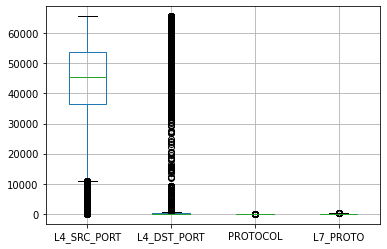

In [32]:
df.boxplot(column=['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO'])

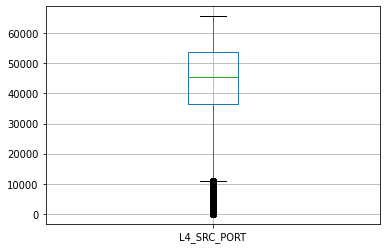

In [33]:
df.boxplot(column='L4_SRC_PORT', return_type='axes');


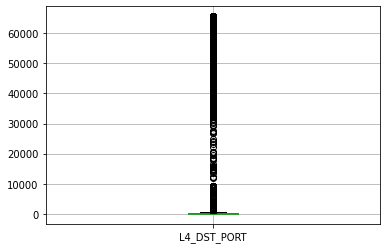

In [34]:
df.boxplot(column='L4_DST_PORT', return_type='axes');

3- the outliers in L4_DST_PORT unique?, numerical?, categorical?

In [40]:
df.L4_DST_PORT.nunique()

16071

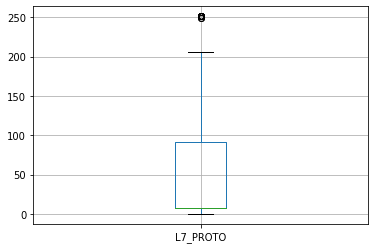

In [37]:
df.boxplot(column='L7_PROTO', return_type='axes');

In [36]:
df.PROTOCOL.value_counts()

6     1251484
17     121467
2        5846
1         344
58        133
Name: PROTOCOL, dtype: int64

In [ ]:
import seaborn as sns
                         
hm = sns.heatmap(data=df.select_dtypes(include='int64'),
                annot=True)
   
# displaying the plotted heatmap
plt.show()